In [1]:
#imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imreg_dft as ird
import time

def imfuse(A,B):
    #function to compare grayscale images, ala matlab's imshowpair
    I = np.dstack((B,A,B))
    return I

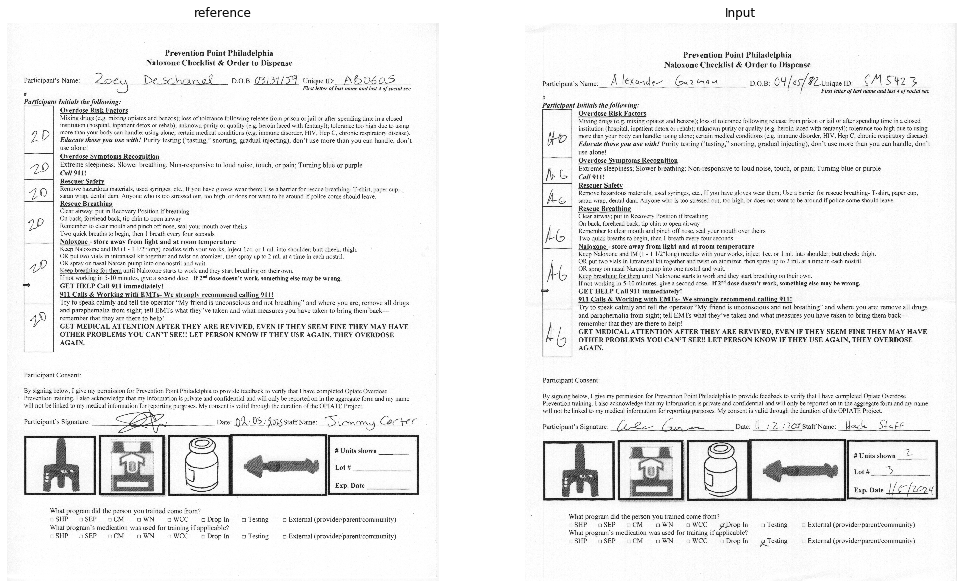

In [2]:
#We're going to try to register two images:
#feedscan checklist1 4 (input)
#flatbed checklist1 0 (reference)
fref = '../scanned_forms/Checklist1/images/FlatBed/Checklist 0.jpeg'
fin = '../scanned_forms/Checklist1/images/FeedScan/Checklist 4.jpeg'

Iref = cv2.imread(fref,0)
Iin = cv2.imread(fin,0)

#show both images side by side
f,ax = plt.subplots(1,2,figsize=(8.5*2,11))
ax[0].imshow(Iref,cmap='gray')
ax[0].axis('off'); ax[0].set_title('reference')
ax[1].imshow(Iin,cmap='gray')
ax[1].axis('off'); ax[1].set_title('Input')
plt.show()

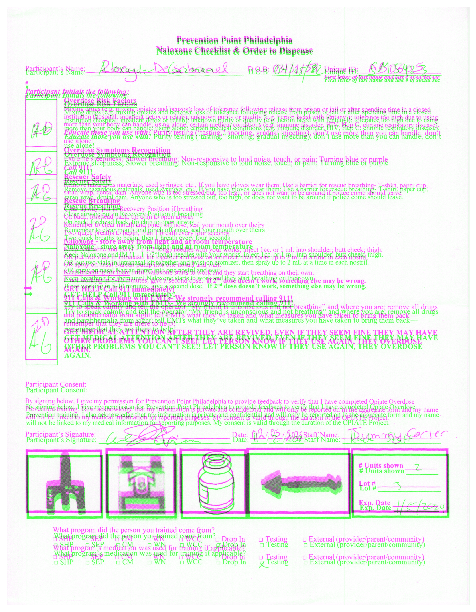

In [3]:
#the imfuse function makes their differences easier to see
plt.figure(figsize=(8.5,11))
plt.imshow(imfuse(Iref,Iin))
plt.axis('off')
plt.show()

#reference is in magenta, input image to align is in green
#bottom of image is noticeably out of alignment

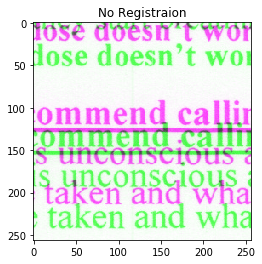

In [4]:
#Select a (relatively) small region of the image to perform alignment on... too big will take a long time. 
#I chose near the center of since it:
#1) has some consistent features/text
#and 2) near the center to not bias the alignment in the top/bottom

x,y,w,h =(1200,1500,256,256) #sub image position

Iref_sub = Iref[y:y+h,x:x+w] #reference sub image
Iin_sub = Iin[y:y+h,x:x+w] #input sub image

#compare them
plt.imshow(imfuse(Iref_sub,Iin_sub)) 
plt.title('No Registraion')
plt.show()

#noticeable misalignment

Computation time = 0.26 seconds


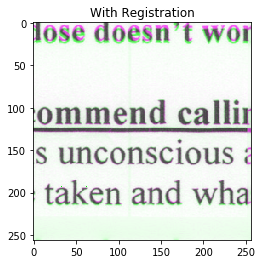

In [5]:
#perform (similarity) alignment using polar phase correlation courtesy of the imreg_dft package
t_start = time.time()
result = ird.similarity(Iref_sub, Iin_sub, numiter=3)
print(f'Computation time = {time.time()-t_start:.2f} seconds')

#compare reference sub image and aligned sub image
plt.imshow(imfuse(Iref_sub,result['timg'].astype(np.uint8)))
plt.title('With Registration')
plt.show()

#much better... still not perfect though
#could play with some parameters, including sub-image size
#could also be due to the underlying transform being non-similarity

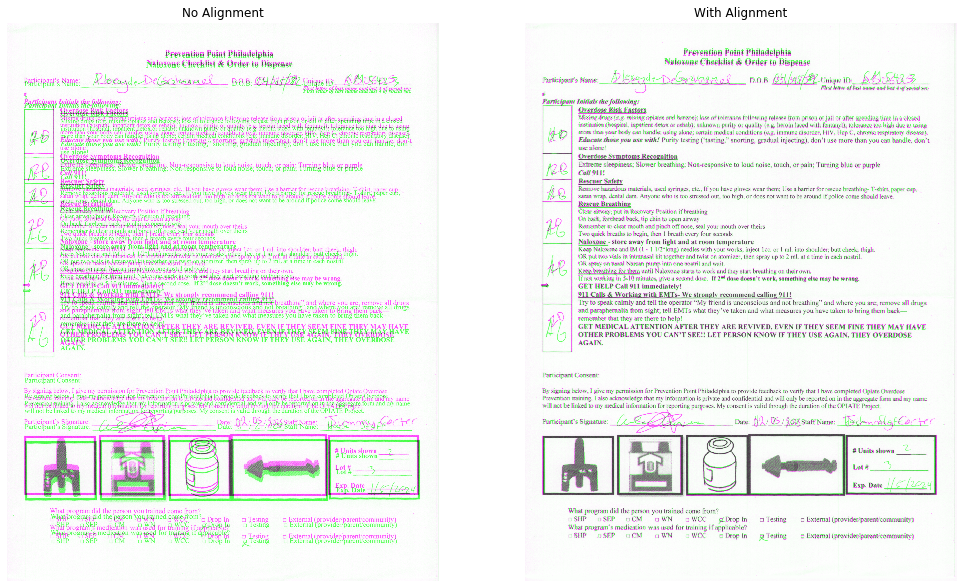

In [6]:
#Now apply transformation we got from the alignment to the whole image
Aligned = ird.transform_img(Iin,scale=result['scale'],angle=result['angle'],tvec=result['tvec'])
Aligned = Aligned.astype(np.uint8) #convert to uint8

#And Compare
f,ax = plt.subplots(1,2,figsize=(8.5*2,11))
ax[0].imshow(imfuse(Iref,Iin))
ax[0].axis('off'); ax[0].set_title('No Alignment')
ax[1].imshow(imfuse(Iref,Aligned))
ax[1].axis('off'); ax[1].set_title('With Alignment')
plt.show()

#Much better. Still some misalignment especially near the top. Is it good enough?